In [1]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Matheus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [3]:
#Importando dados
df = pd.read_csv('cat_acidentes.csv', sep=';')
pd.set_option('display.max_columns', 50)
df

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2024-12-01 01:32:41,0.0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0,190816,0.000000e+00,0.000000e+00,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2024-12-01 01:32:41,6699.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,655726,-8.178406e+08,1.295680e+09,AV ASSIS BRASIL,NaN,ABALROAMENTO,TERÇA-FEIRA,02:45:00.0000000,NOITE,NORTE,NaN
2,2024-12-01 01:32:41,411.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,5,0,655729,-8.267608e+08,1.292030e+09,R DR BARROS CASSAL,NaN,ABALROAMENTO,TERÇA-FEIRA,07:36:00.0000000,DIA,CENTRO,NaN
3,2024-12-01 01:32:41,1500.0,0.0,2019-01-01 00:00:00,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,655732,-8.272275e+08,1.285404e+09,AV FABIO ARAUJO SANTOS,NaN,CHOQUE,TERÇA-FEIRA,16:50:00.0000000,DIA,SUL,NaN
4,2024-12-01 01:32:41,8799.0,0.0,2019-01-01 00:00:00,5,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,655735,-8.201465e+08,1.288712e+09,AV IPIRANGA,NaN,COLISÃO,TERÇA-FEIRA,19:00:00.0000000,NOITE,LESTE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77334,2024-12-01 01:32:41,828.0,0.0,2024-11-24 00:00:00,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,763430,-5.121400e+01,-3.003417e+01,AV OSVALDO ARANHA,NaN,COLISÃO,DOMINGO,13:40:00.0000000,DIA,CENTRO,NaN
77335,2024-12-01 01:32:41,186.0,0.0,2024-11-21 00:00:00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,763431,-5.121885e+01,-3.004590e+01,AV ERICO VERISSIMO,R ALCIDES DE OLIVEIRA GOMES,COLISÃO,QUINTA-FEIRA,06:25:00.0000000,DIA,CENTRO,MAIS (LOTE 6)
77336,2024-12-01 01:32:41,45.0,0.0,2024-11-21 00:00:00,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,763432,-5.122295e+01,-3.002501e+01,R CARLOS CHAGAS,AV JULIO DE CASTILHOS,ABALROAMENTO,QUINTA-FEIRA,08:25:00.0000000,DIA,CENTRO,NaN
77337,2024-12-01 01:32:41,442.0,0.0,2024-11-19 00:00:00,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,763433,-5.120970e+01,-3.003322e+01,R FELIPE CAMARAO,NaN,COLISÃO,TERÇA-FEIRA,07:45:00.0000000,DIA,CENTRO,NaN


In [4]:
# Garantindo que as colunas existam antes de tentar removê-las
colunas_para_remover = ['data_extracao', 'predial1', 'queda_arr', 'patinete', 'idacidente', 'log1', 'log2', 'consorcio']
df = df.drop(columns=[col for col in colunas_para_remover if col in df.columns], errors='ignore')

# Removendo linhas com valores nulos em latitude e longitude
df = df.dropna(subset=['latitude', 'longitude'], how='any')

# Convertendo a coluna 'data' para datetime e tratando erros
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Removendo linhas com datas inválidas (NaT)
df = df.dropna(subset=['data'])

# Filtrando para excluir anos inconsistentes
anos_invalidos = [2202, 2025, 2026]
df = df[~df['data'].dt.year.isin(anos_invalidos)]

df.reset_index(drop=True, inplace=True)

df

,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,longitude,latitude,tipo_acid,dia_sem,hora,noite_dia,regiao
0,2020-10-17,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0.000000e+00,0.000000e+00,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE
1,2019-01-01,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,-8.178406e+08,1.295680e+09,ABALROAMENTO,TERÇA-FEIRA,02:45:00.0000000,NOITE,NORTE
2,2019-01-01,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,5,-8.267608e+08,1.292030e+09,ABALROAMENTO,TERÇA-FEIRA,07:36:00.0000000,DIA,CENTRO
3,2019-01-01,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,-8.272275e+08,1.285404e+09,CHOQUE,TERÇA-FEIRA,16:50:00.0000000,DIA,SUL
4,2019-01-01,5,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,-8.201465e+08,1.288712e+09,COLISÃO,TERÇA-FEIRA,19:00:00.0000000,NOITE,LESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66754,2024-11-24,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,-5.121400e+01,-3.003417e+01,COLISÃO,DOMINGO,13:40:00.0000000,DIA,CENTRO
66755,2024-11-21,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-5.121885e+01,-3.004590e+01,COLISÃO,QUINTA-FEIRA,06:25:00.0000000,DIA,CENTRO
66756,2024-11-21,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,-5.122295e+01,-3.002501e+01,ABALROAMENTO,QUINTA-FEIRA,08:25:00.0000000,DIA,CENTRO
66757,2024-11-19,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,-5.120970e+01,-3.003322e+01,COLISÃO,TERÇA-FEIRA,07:45:00.0000000,DIA,CENTRO


In [5]:
#Gerando mapa de calor dos acidentes
mapa_1 = folium.Map(location=[-30.1, -51.15], zoom_start=11)
coordenadas = list(zip(df['latitude'], df['longitude']))
mapa_calor = HeatMap(coordenadas, radius=9, blur=10)
mapa_1.add_child(mapa_calor)
mapa_1.save('mapa_calor_acidentes.html')

In [6]:
#Gerando mapa de cluster dos acidentes
mapa_2 = folium.Map(location=[-30.1, -51.15], zoom_start=11)
coordenadas = list(zip(df['latitude'], df['longitude']))
mapa_cluster = MarkerCluster(coordenadas, radius=9, blur=10)
mapa_2.add_child(mapa_cluster)
mapa_2.save('mapa_cluster_acidentes.html')

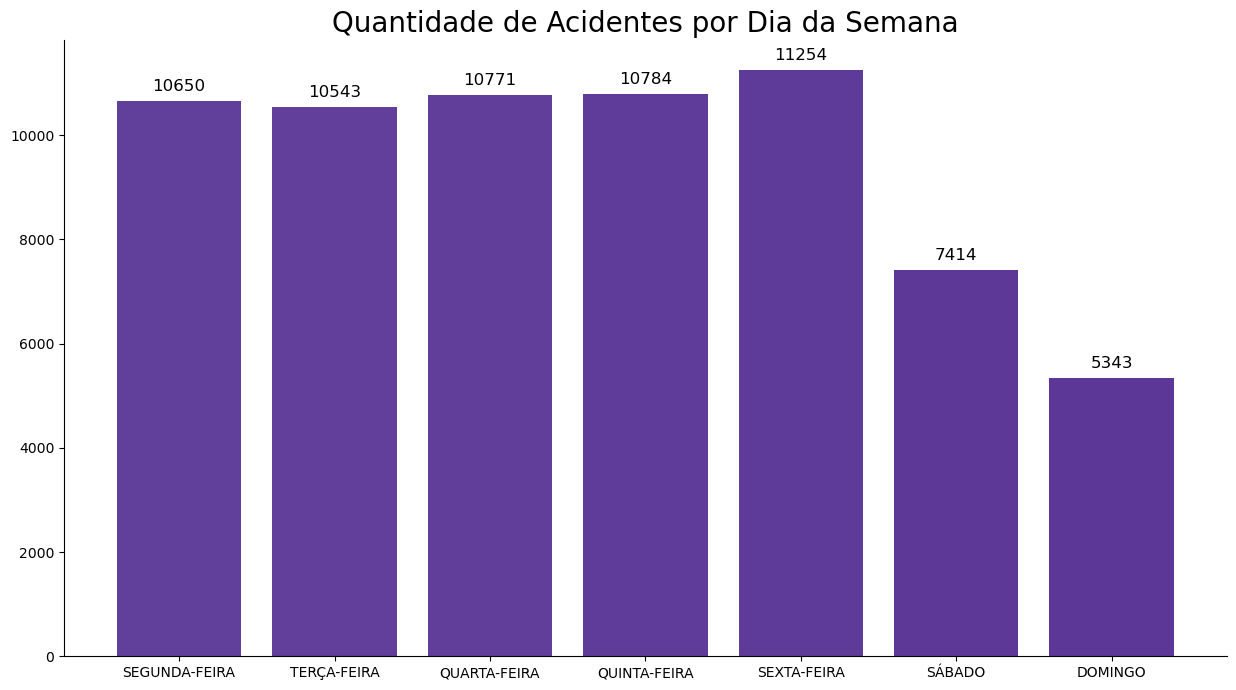

In [7]:
# Definindo a ordem dos dias da semana
ordem_dias = ['SEGUNDA-FEIRA', 'TERÇA-FEIRA', 'QUARTA-FEIRA', 'QUINTA-FEIRA', 'SEXTA-FEIRA', 'SÁBADO', 'DOMINGO']

# Gerando o DataFrame de acidentes por dia da semana
df_acidentes_semana = df.groupby('dia_sem')['data'].count().reset_index()
df_acidentes_semana['dia_sem'] = pd.Categorical(df_acidentes_semana['dia_sem'], categories=ordem_dias, ordered=True)
df_acidentes_semana = df_acidentes_semana.sort_values(by='dia_sem')
df_acidentes_semana.columns = ['dia_sem', 'qtd_acidentes']

# Gerando gráfico
valores = df_acidentes_semana['qtd_acidentes']
cores_dias_sem = plt.cm.Purples(np.linspace(0.8, 1))

fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(df_acidentes_semana['dia_sem'], valores, color=cores_dias_sem)
ax.set_title('Quantidade de Acidentes por Dia da Semana', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.bar_label(bars, padding=5, fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('grafico_acidentes_dia_semana.png', dpi=300, bbox_inches='tight')
plt.show()


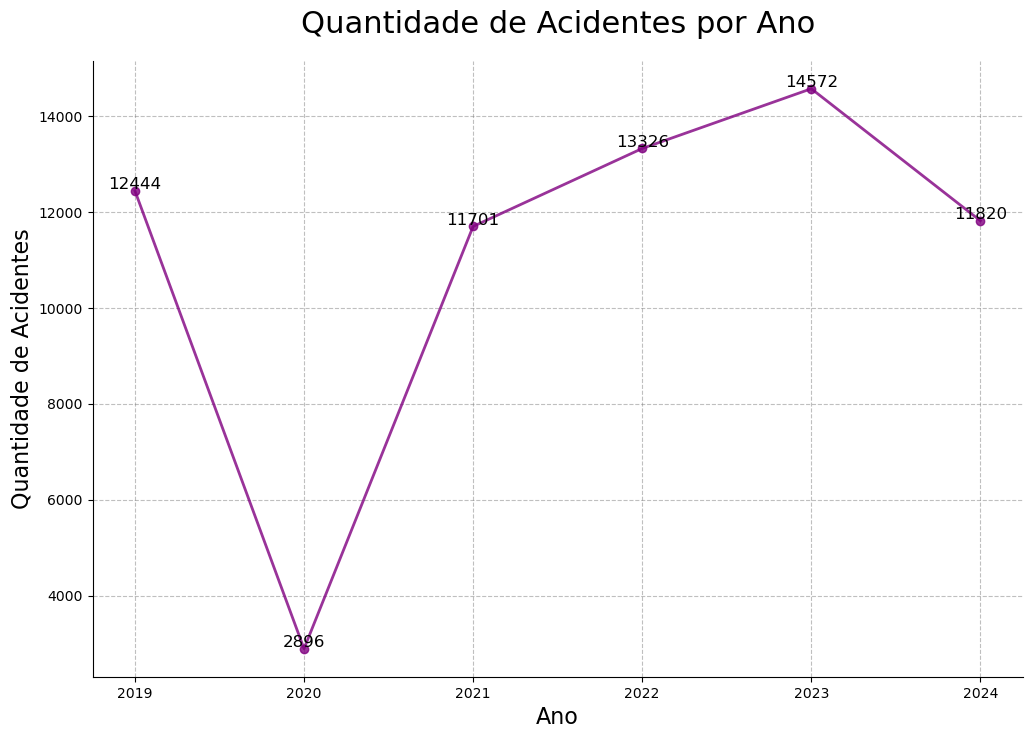

In [8]:
# Gerando data frame por ano
df_ano = df['data'].dt.year.value_counts().reset_index()
df_ano.columns = ['ano', 'qtd_acidentes']
df_ano = df_ano.sort_values(by='ano')

# Gerando gráfico
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df_ano['ano'], df_ano['qtd_acidentes'], marker='o', color='purple', linestyle='-', linewidth=2, alpha=0.8)
ax.set_title('Quantidade de Acidentes por Ano', fontsize=22, pad=20)
ax.set_xlabel('Ano', fontsize=16)
ax.set_ylabel('Quantidade de Acidentes', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', color='gray', alpha=0.5)


for i, valor in enumerate(df_ano['qtd_acidentes']):
    ax.text(df_ano['ano'].iloc[i], valor + 30, str(valor), fontsize=12, ha='center')

plt.savefig('grafico_acidentes_ano.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_7664\3323205690.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(novos_rotulos)


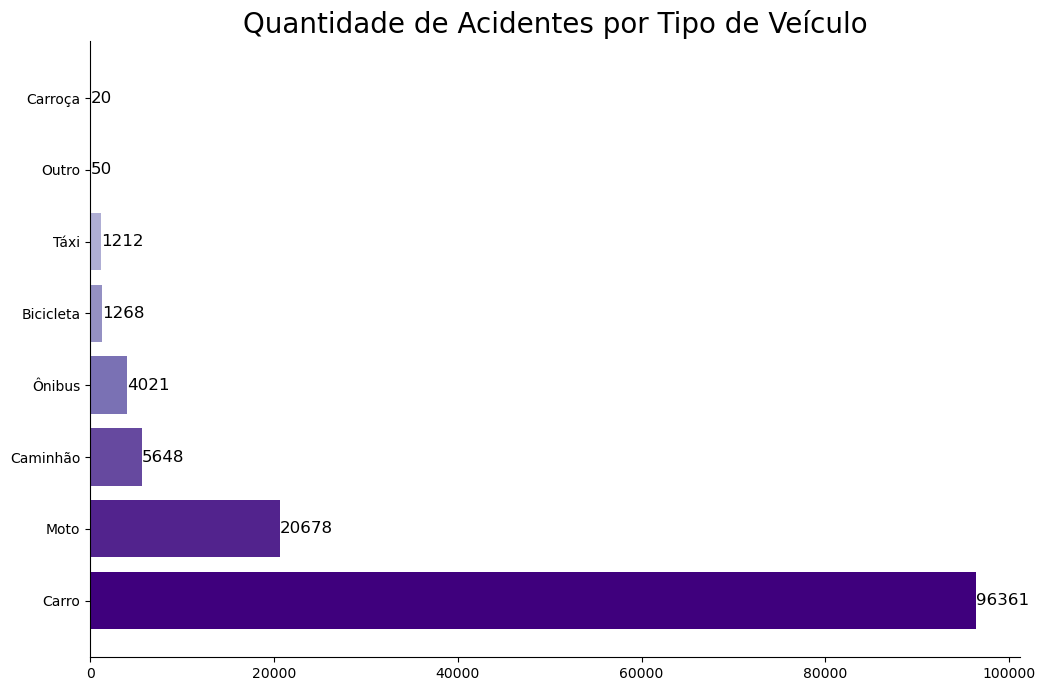

In [9]:
# Gerando data frame de tipos de veiculos envolvidos em acidentes
df_acid_veiculo = df[['auto', 'taxi', 'caminhao', 'moto', 'carroca', 'bicicleta', 'outro']].sum().reset_index()
df_acid_veiculo.columns = ['veiculo', 'qtd']
onibus_total = df[['lotacao', 'onibus_int', 'onibus_met', 'onibus_urb']].sum().sum()
df_acid_onibus = pd.DataFrame({'veiculo': ['onibus'], 'qtd': [onibus_total]})
df_acid_veiculo = pd.concat([df_acid_veiculo, df_acid_onibus], ignore_index=True)
df_acid_veiculo = df_acid_veiculo.sort_values(by='qtd', ascending=False)
df_acid_veiculo

#Gerando Gráfico
fig, ax = plt.subplots(figsize=(12, 8))
cores_tipo_veiculos = plt.cm.Purples(np.linspace(1, 0.2, len(df_acid_veiculo)))
bars = ax.barh(df_acid_veiculo['veiculo'], df_acid_veiculo['qtd'], color=cores_tipo_veiculos)
plt.title('Quantidade de Acidentes por Tipo de Veículo', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

novos_rotulos = ['Carro', 'Moto', 'Caminhão', 'Ônibus', 'Bicicleta', 'Táxi', 'Outro', 'Carroça']
ax.set_yticklabels(novos_rotulos)

for bar in bars:
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
            f'{int(bar.get_width())}', va='center', fontsize=12, color='black')
    
plt.savefig('grafico_acidentes_tipo_veiculo.png', dpi=300, bbox_inches='tight')
plt.show()

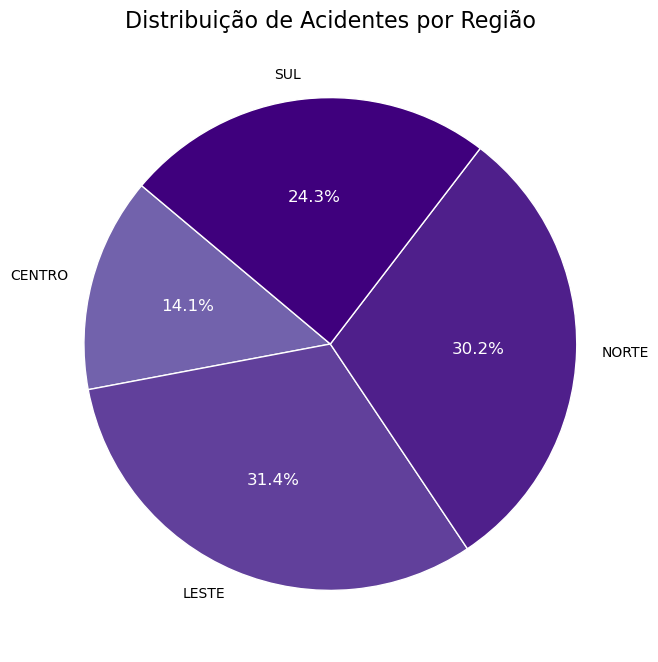

In [10]:
#Gerando data frame de quantidade de acidentes de acordo com a região
df_acidentes_regiao = df.groupby('regiao')['data'].count().reset_index()
df_acidentes_regiao.columns = ['regiao', 'qtd_acidentes']

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 8))
cores = plt.cm.Purples(np.linspace(0.7, 1, len(df_acidentes_regiao)))
wedges, texts, autotexts = ax.pie(
    df_acidentes_regiao['qtd_acidentes'],
    labels=df_acidentes_regiao['regiao'],
    autopct='%1.1f%%',
    colors=cores,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.title('Distribuição de Acidentes por Região', fontsize=16)
plt.savefig('grafico_acidentes_regiao.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
df_lucas  = pd.read_csv('Planilha sem título - Página1.csv')
df_lucas = df_lucas.groupby('Estado')
df_lucas

KeyError: 'Estado'